In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
tickers_array = np.load('S&P500_tickers.npy')  # Substitua pelo caminho correto do arquivo

# Converter para lista
tickers_list = tickers_array.tolist()

# DataFrame para armazenar volatilidades
volatility_data = []

# Período de análise
start_date = "2010-01-01"
end_date = "2023-12-31"

# Iterar sobre cada ticker
for ticker in tickers_list:
    try:
        # Baixar dados históricos
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Verificar se 'Close' existe nos dados
        if 'Close' not in data:
            print(f"Erro ao processar o ticker {ticker}: Dados insuficientes.")
            continue
        
        # Calcular retornos diários
        data['Daily_Return'] = data['Close'].pct_change()
        
        # Calcular volatilidade como o desvio padrão dos retornos diários
        volatility = data['Daily_Return'].std()
        
        # Adicionar dados de volatilidade
        volatility_data.append({"Ticker": ticker, "Volatility": volatility})
    
    except Exception as e:
        print(f"Erro ao processar o ticker {ticker}: {e}")

# Criar DataFrame final
volatility_df = pd.DataFrame(volatility_data)

# Salvar resultado em um arquivo CSV
volatility_df.to_csv("tickers_volatility.csv", index=False)

print("Cálculo de volatilidades concluído. Dados salvos em 'tickers_volatility.csv'.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

Dados carregados:
        Volatility
Ticker            
MMM       0.014113
AOS       0.017328
ABT       0.013662
ACN       0.015260
ADBE      0.019977


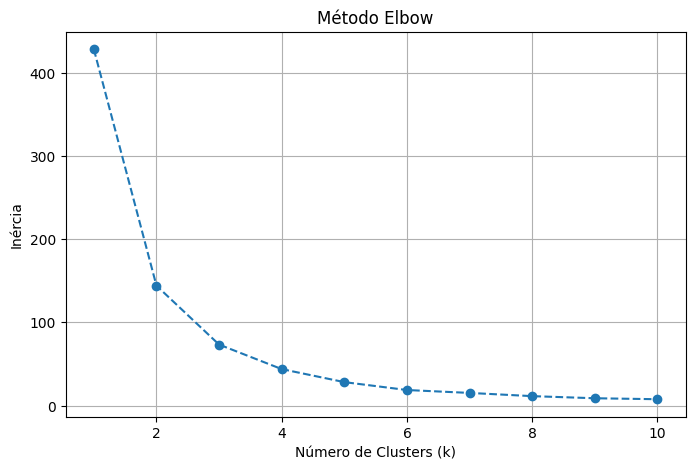

Clusters salvos em: tickers_volatility_clusters.csv
Cluster 0: 198 tickers
['MMM', 'AOS', 'ABT', 'ACN', 'AFL', 'APD', 'ARE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AEE', 'AEP', 'AMT', 'AWK', 'AME', 'AMGN', 'APH', 'AON', 'ACGL', 'ADM', 'AJG', 'AIZ', 'T', 'ATO', 'ADP', 'AZO', 'AVB', 'BALL', 'BAX', 'BDX', 'TECH', 'BK', 'BMY', 'BR', 'BRO', 'CHRW', 'CPT', 'CPB', 'CAH', 'COR', 'CNP', 'CVX', 'CB', 'CHD', 'CINF', 'CTAS', 'CSCO', 'CLX', 'CME', 'CMS', 'KO', 'CL', 'CMCSA', 'CAG', 'ED', 'COO', 'CPRT', 'COST', 'CCI', 'CVS', 'DHR', 'DLR', 'DG', 'D', 'DOV', 'DTE', 'DUK', 'ECL', 'EIX', 'EMR', 'ETR', 'EFX', 'EQR', 'ERIE', 'ESS', 'EG', 'EVRG', 'ES', 'EXC', 'EXPD', 'EXR', 'XOM', 'FDS', 'FAST', 'FRT', 'FIS', 'FE', 'FI', 'GRMN', 'GD', 'GIS', 'GPC', 'GL', 'HSIC', 'HSY', 'HD', 'HON', 'HRL', 'HUBB', 'IBM', 'IEX', 'ITW', 'ICE', 'IFF', 'JBHT', 'JKHY', 'JNJ', 'JCI', 'K', 'KMB', 'KR', 'LHX', 'LH', 'LLY', 'LIN', 'LMT', 'L', 'MMC', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MTD', 'MSFT', 'MAA', 'TAP', 'MDLZ', 'MSI', 'NDAQ'

In [5]:
# Carregar os dados de volatilidade
file_name = "tickers_volatility.csv"
volatility_data = pd.read_csv(file_name, index_col=0)

# Verificar as primeiras linhas do DataFrame
print("Dados carregados:")
print(volatility_data.head())

# Confirmar que a coluna correta é usada
volatility_column_name = "Volatility"  # Substitua pelo nome correto, se necessário
if volatility_column_name not in volatility_data.columns:
    print(f"A coluna '{volatility_column_name}' não foi encontrada. Verifique o arquivo.")
    print(f"Colunas disponíveis: {volatility_data.columns}")
    raise KeyError(f"Coluna '{volatility_column_name}' não encontrada no arquivo.")

# Obter os valores de volatilidade
volatilities = volatility_data[volatility_column_name].values.reshape(-1, 1)

# Normalizar os dados
scaler = StandardScaler()
volatilities_scaled = scaler.fit_transform(volatilities)

# Determinar o número ideal de clusters (método elbow)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(volatilities_scaled)
    inertia.append(kmeans.inertia_)

# Plot do método elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Método Elbow")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()

# Escolher o número de clusters com base no método elbow
n_clusters = 3  # Ajuste conforme o gráfico
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(volatilities_scaled)

# Adicionar os clusters ao DataFrame original
volatility_data['Cluster'] = kmeans.labels_

# Salvar os clusters em um novo arquivo
output_file = "tickers_volatility_clusters.csv"
volatility_data.to_csv(output_file)
print(f"Clusters salvos em: {output_file}")

# Visualizar os clusters
for cluster in range(n_clusters):
    tickers_in_cluster = volatility_data[volatility_data['Cluster'] == cluster].index
    print(f"Cluster {cluster}: {len(tickers_in_cluster)} tickers")
    print(tickers_in_cluster.tolist())


Dados carregados:
        Volatility
Ticker            
MMM       0.014113
AOS       0.017328
ABT       0.013662
ACN       0.015260
ADBE      0.019977
Clusters salvos em: tickers_volatility_clusters.csv


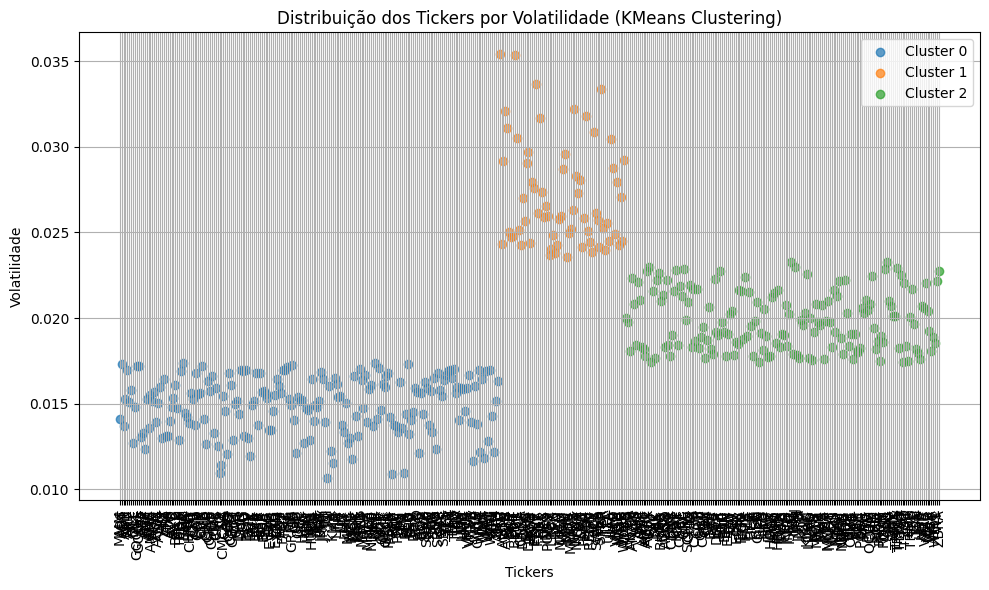

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar os dados de volatilidade
file_name = "tickers_volatility.csv"
volatility_data = pd.read_csv(file_name, index_col=0)

# Verificar as primeiras linhas do DataFrame
print("Dados carregados:")
print(volatility_data.head())

# Confirmar que a coluna correta é usada
volatility_column_name = "Volatility"  # Substitua pelo nome correto, se necessário
if volatility_column_name not in volatility_data.columns:
    print(f"A coluna '{volatility_column_name}' não foi encontrada. Verifique o arquivo.")
    print(f"Colunas disponíveis: {volatility_data.columns}")
    raise KeyError(f"Coluna '{volatility_column_name}' não encontrada no arquivo.")

# Obter os valores de volatilidade
volatilities = volatility_data[volatility_column_name].values.reshape(-1, 1)

# Normalizar os dados
scaler = StandardScaler()
volatilities_scaled = scaler.fit_transform(volatilities)

# Escolher o número de clusters com base no gráfico
n_clusters = 3  # Ajuste conforme o gráfico
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(volatilities_scaled)

# Adicionar os clusters ao DataFrame original
volatility_data['Cluster'] = kmeans.labels_

# Salvar os clusters em um novo arquivo
output_file = "tickers_volatility_clusters.csv"
volatility_data.to_csv(output_file)
print(f"Clusters salvos em: {output_file}")

# Visualizar os clusters em um gráfico
plt.figure(figsize=(10, 6))

# Plotando os pontos com diferentes cores por cluster
for cluster in range(n_clusters):
    cluster_data = volatility_data[volatility_data['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data[volatility_column_name], 
                label=f'Cluster {cluster}', alpha=0.7)

# Adicionar título e labels
plt.title("Distribuição dos Tickers por Volatilidade (KMeans Clustering)")
plt.xlabel("Tickers")
plt.ylabel("Volatilidade")
plt.xticks(rotation=90)  # Girar os tickers no eixo x para melhor visualização
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()
